My First Notebook


In [73]:
import numpy as np
import os
import warnings
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [74]:
df= pd.read_csv('data_beras.csv')
df.head()

,tahun,kualitas,bulan,harga
0,2021,Premium,januari,9780.19
1,2021,Medium,januari,9404.74
2,2021,Luar Kualitas,januari,9036.42
3,2021,Premium,febuari,9772.10
4,2021,Medium,febuari,9386.31


In [75]:
df_premium = df[df['kualitas'] == 'Premium'][['tahun', 'bulan', 'harga']]
df_medium = df[df['kualitas'] == 'Medium'][['tahun', 'bulan', 'harga']]
df_luar_kualitas = df[df['kualitas'] == 'Luar Kualitas'][['tahun', 'bulan', 'harga']]

In [76]:
df_premium

,tahun,bulan,harga
0,2021,januari,9780.19
3,2021,febuari,9772.10
6,2021,maret,9606.97
9,2021,april,9549.76
12,2021,mei,9627.08
15,2021,juni,9537.16
18,2021,juli,9401.61
21,2021,agustus,9499.36
24,2021,septermber,9455.56
27,2021,oktober,9449.47


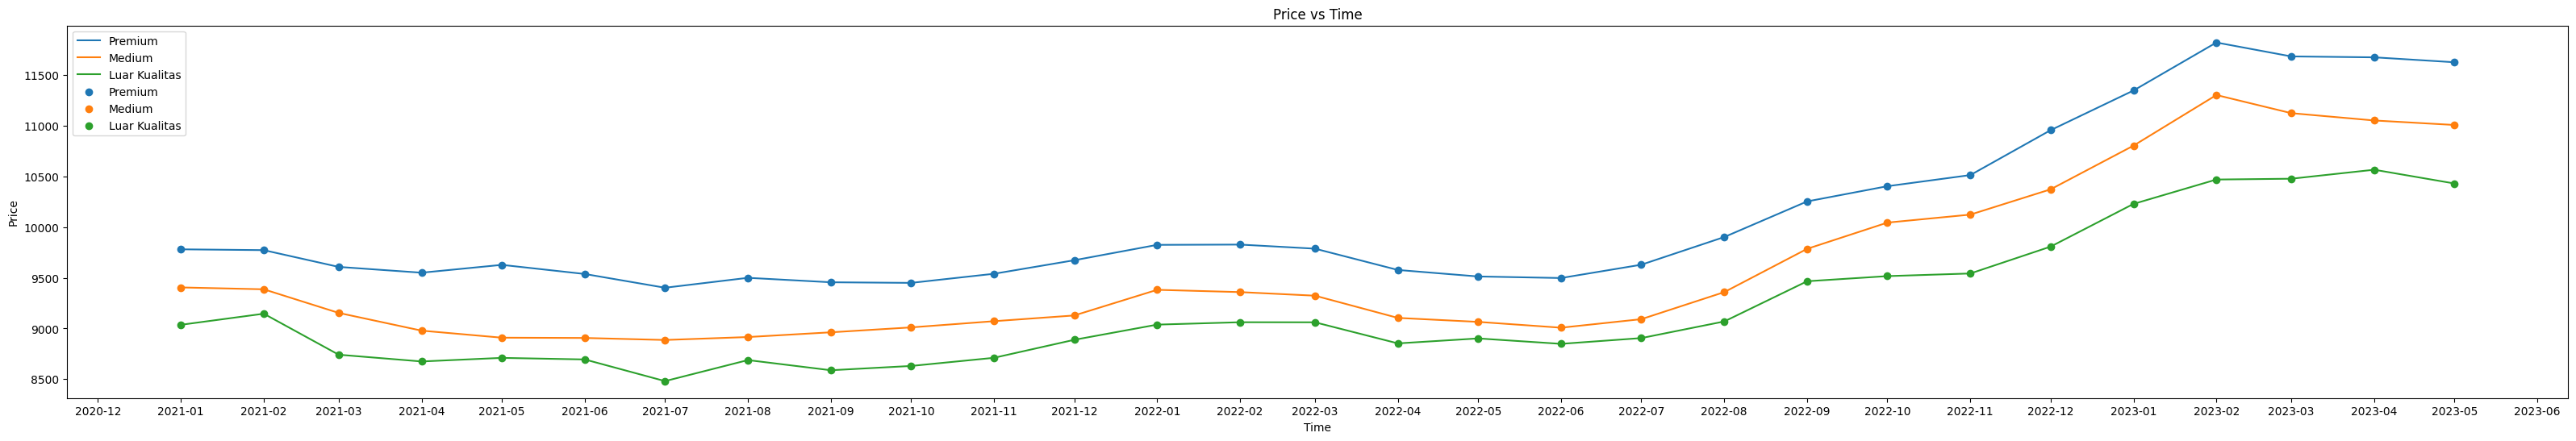

In [77]:
bulan_dict = {'januari': 1, 'febuari': 2, 'maret': 3, 'april': 4, 'mei': 5,
              'juni': 6, 'juli': 7, 'agustus': 8, 'septermber': 9, 
              'oktober': 10, 'november': 11, 'desember': 12}


df_premium['date'] = pd.to_datetime(df_premium['tahun'].astype(str) + '-' + df_premium['bulan'].map(bulan_dict).astype(str))
df_medium['date'] = pd.to_datetime(df_medium['tahun'].astype(str) + '-' + df_medium['bulan'].map(bulan_dict).astype(str))
df_luar_kualitas['date'] = pd.to_datetime(df_luar_kualitas['tahun'].astype(str) + '-' + df_luar_kualitas['bulan'].map(bulan_dict).astype(str))



plt.figure(figsize=(40, 6))
plt.plot(df_premium['date'], df_premium['harga'], label='Premium')
plt.plot(df_medium['date'], df_medium['harga'], label='Medium')
plt.plot(df_luar_kualitas['date'], df_luar_kualitas['harga'], label='Luar Kualitas')

plt.scatter(df_premium['date'], df_premium['harga'], label='Premium')
plt.scatter(df_medium['date'], df_medium['harga'], label='Medium')
plt.scatter(df_luar_kualitas['date'], df_luar_kualitas['harga'], label='Luar Kualitas')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price vs Time')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()


In [118]:
df_premium

,tahun,bulan,harga
date,,,
2021-01-01,2021,januari,9780.19
2021-02-01,2021,febuari,9772.10
2021-03-01,2021,maret,9606.97
2021-04-01,2021,april,9549.76
2021-05-01,2021,mei,9627.08
2021-06-01,2021,juni,9537.16
2021-07-01,2021,juli,9401.61
2021-08-01,2021,agustus,9499.36
2021-09-01,2021,septermber,9455.56


In [79]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [80]:
warnings.filterwarnings("ignore") 

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['harga'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1824.3680163313938
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1526.880104403285
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1151.7749674872682
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:960.8109384630875
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1143.7533265529364
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1112.9853926139945
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:975.4032117027173
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:957.3177274734045
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1744.7299371543936
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1487.9068921254911
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1062.6657512966979
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:885.8686391520572
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1078.8302307014355
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1035.8223141866204
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:919.5973069406228
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:883.8244311142081
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1350.7870484806192
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1099.9760730314829

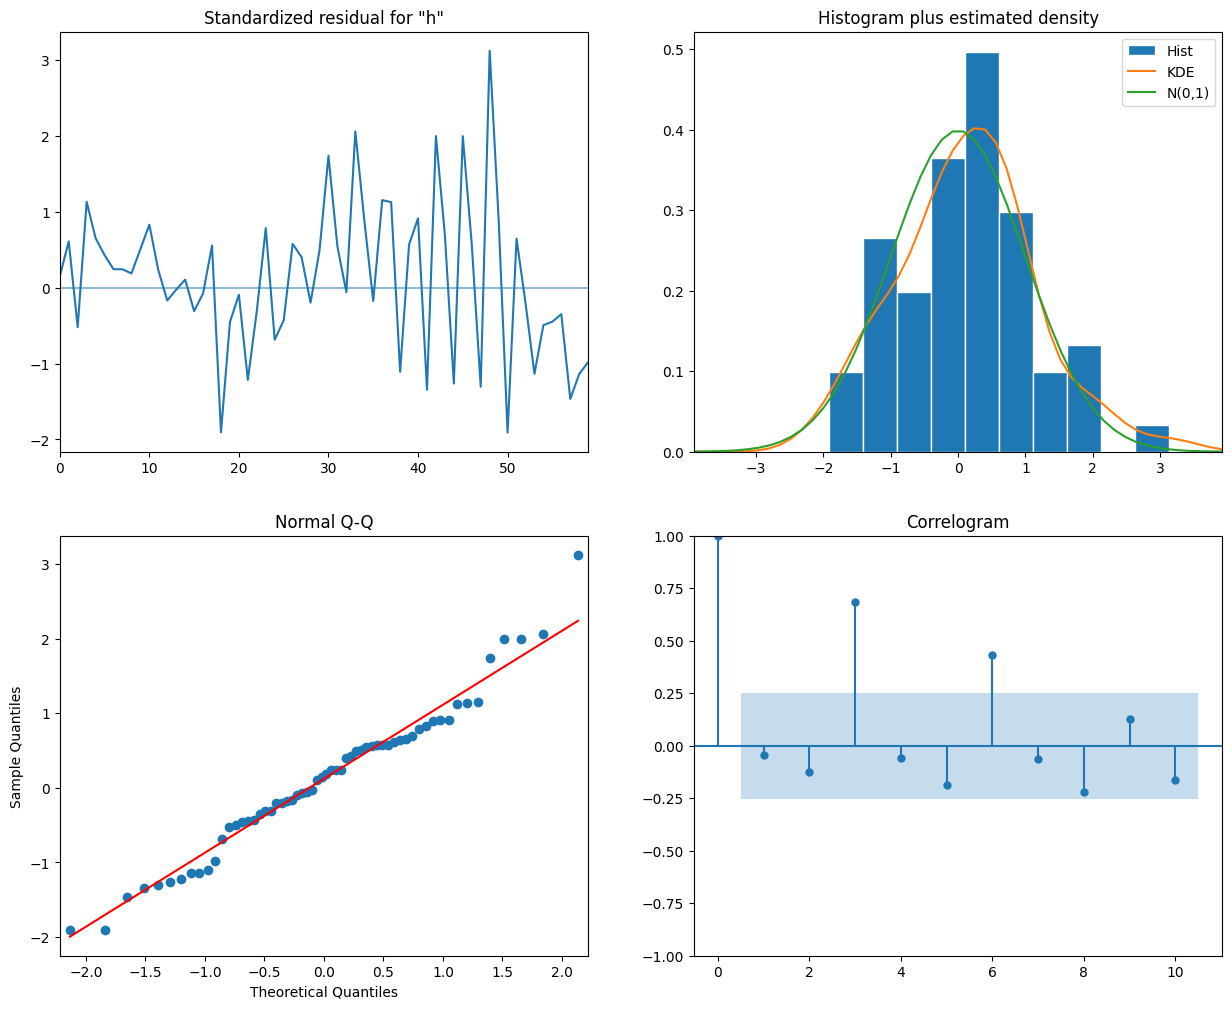

In [81]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [121]:
pred = results.get_prediction(df=pd.Timestamp('2023-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [125]:
df_premium['date'] = pd.to_datetime(df_premium['date'])
df_premium.set_index('date', inplace=True)
pred.predicted_mean.index = pd.to_datetime(pred.predicted_mean.index)

KeyError: 'date'

TypeError: index type not supported

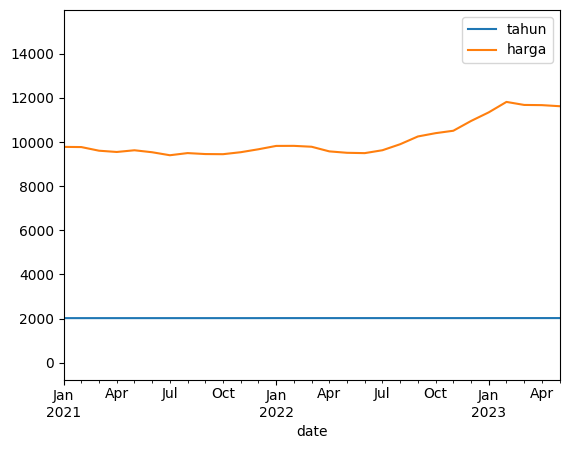

In [123]:
ax = df_premium['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('harga')
plt.legend()
plt.show()

In [124]:
print(type(df_premium.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
